## Imports

In [1]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

C:\Anaconda3\envs\tensorflow_gpu_1.9\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Anaconda3\envs\tensorflow_gpu_1.9\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Anaconda3\envs\tensorflow_gpu_1.9\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Anaconda3\envs\tensorflow_gpu_1.9\lib\site-packages\tensorflow\pyth

## Check version (Should be less than 2, preferably 1.14)

In [2]:
print(tf.__version__)

1.14.0


## Check if TensorFlow is using your GPU.

In [3]:
tf.test.is_gpu_available()

True

## Setup directories, examine numbers of images

In [4]:
train_dir = os.path.join('.', 'train')
validation_dir = os.path.join('.', 'validation')
test_dir = os.path.join('.', 'test2')

In [5]:
training_folders = os.listdir('./train')
total_train  = 0
for folder in training_folders:
    total_train += len(os.listdir('./train/{}'.format(folder)))
    
training_folders = os.listdir('./validation')
total_val = 0
for folder in training_folders:
    total_val += len(os.listdir('./validation/{}'.format(folder)))
    
test_folders = os.listdir('./test2')
total_test  = 0
for folder in test_folders:
    total_test += len(os.listdir('./test2/{}'.format(folder)))

In [6]:
print("Total training images:", total_train)
print("Total validation images:", total_val)
print("Total testing images:", total_test)

Total training images: 74229
Total validation images: 12958
Total testing images: 870


## Setup hyperparameters

In [7]:
batch_size = 64
epochs = 5
IMG_HEIGHT = 48
IMG_WIDTH = 48

## Scale images

In [8]:
train_image_generator = ImageDataGenerator(rescale=1./255,
                                           brightness_range=[0.25,1.5]) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data
test_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

## Setup data generators for train, val, and test

In [9]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH))

Found 74229 images belonging to 29 classes.


In [10]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH))

Found 12958 images belonging to 29 classes.


In [11]:
test_data_gen = test_image_generator.flow_from_directory(batch_size=870,
                                                              directory=test_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH))

Found 870 images belonging to 29 classes.


## Generate the test set.  Literally just a batch of ALL the test images.

In [12]:
test_set, _ = next(test_data_gen)

## Check out what your images look like.  Peek at a train batch.

In [13]:
sample_training_images, _ = next(train_data_gen)

In [14]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

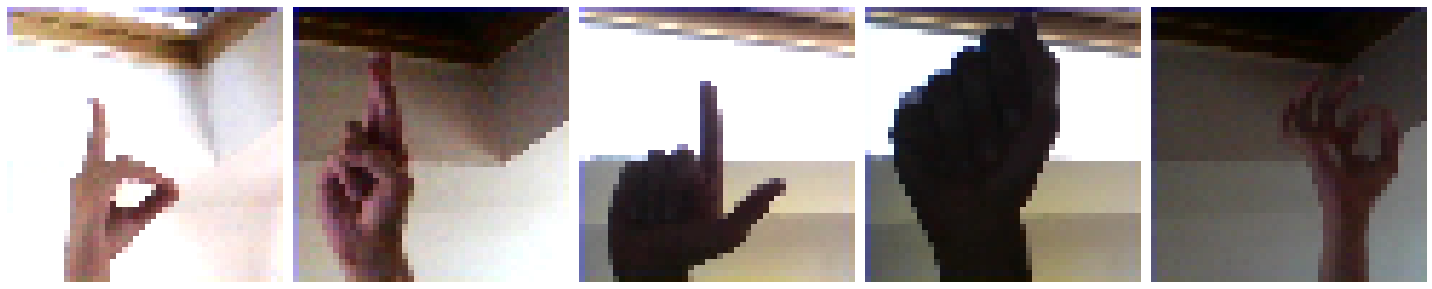

In [15]:
plotImages(sample_training_images[:5])

## Create model

In [16]:
model = Sequential([
    Conv2D(64, 4, strides=1, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    Conv2D(64, 4, strides=2, padding='same', activation='relu'),
    Dropout(0.5),
    Conv2D(128, 4, strides=1, padding='same', activation='relu'),
    Conv2D(128, 4, strides=2, padding='same', activation='relu'),
    Dropout(0.5),
    Conv2D(256, 4, strides=1, padding='same', activation='relu'),
    Conv2D(256, 4, strides=2, padding='same', activation='relu'),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(29, activation='softmax')
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


## Compile model

In [17]:
model.compile(optimizer='rmsprop',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        3136      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        65600     
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       131200    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 128)       262272    
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 256)       5

## Train model

In [19]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/5
1159/1159 [==============================] - 100s 86ms/step - loss: 1.8350 - acc: 0.4689 - val_loss: 0.2166 - val_acc: 0.9261
Epoch 2/5
1159/1159 [==============================] - 100s 87ms/step - loss: 0.2462 - acc: 0.9182 - val_loss: 0.0512 - val_acc: 0.9838
Epoch 3/5
1159/1159 [==============================] - 99s 85ms/step - loss: 0.1386 - acc: 0.9586 - val_loss: 0.0214 - val_acc: 0.9921
Epoch 4/5
1159/1159 [==============================] - 96s 83ms/step - loss: 0.1139 - acc: 0.9683 - val_loss: 0.0151 - val_acc: 0.9944
Epoch 5/5
1159/1159 [==============================] - 98s 85ms/step - loss: 0.1040 - acc: 0.9737 - val_loss: 0.0179 - val_acc: 0.9936


## Plot accuracy

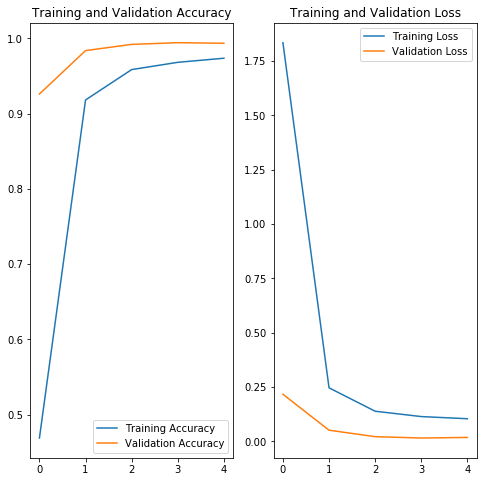

In [20]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Get accuracy on the test set

In [21]:
# You can also evaluate or predict on a dataset.
print('\n# Evaluate')
result = model.evaluate(test_data_gen)
# dict(zip(model.metrics_names, result))


# Evaluate
1/1 [==============================] - 1s 1s/step - loss: 7.3255 - acc: 0.4161


## Test just classifying one image

In [38]:
test_image = tf.keras.preprocessing.image.load_img('./test2/A_test.jpg', target_size = (150, 150))
test_image = tf.keras.preprocessing.image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)
print(image)
print(result)

A1012.jpg
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]]


## Test classifying a whole directory

In [59]:
for image in os.listdir('./test2/A'):
    test_image = tf.keras.preprocessing.image.load_img('./test2/A/{}'.format(image), target_size = (150, 150))
    test_image = tf.keras.preprocessing.image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis=0)
    result = model.predict(test_image)
    print(image)
    print(result)

A0001_test.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 0. 0. 0. 0.]]
A0002_test.jpg
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]]
A0003_test.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]]
A0004_test.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]]
A0005_test.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]]
A0006_test.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]]
A0007_test.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]]
A0008_test.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]]
A0009_test.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]]
A0010_test.jpg
[[0. 0. 0. 0.

In [60]:
model.save('4828_percent_acc.h5')